In [29]:
# Pacotes de Manipulação de Dados
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Keras e TensorFlow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf


# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sn
import scikitplot as skplt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [2]:
# Carregando os dados
file = tf.keras.utils
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Shape dos dados (linhas x colunas)
df.shape

(284807, 31)

In [4]:
# Visualizando os tipos de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Verificando se o dataset tem valores nulos
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

<AxesSubplot: title={'center': 'Correlação das Variáveis de Entrada com a Classe de Saída'}>

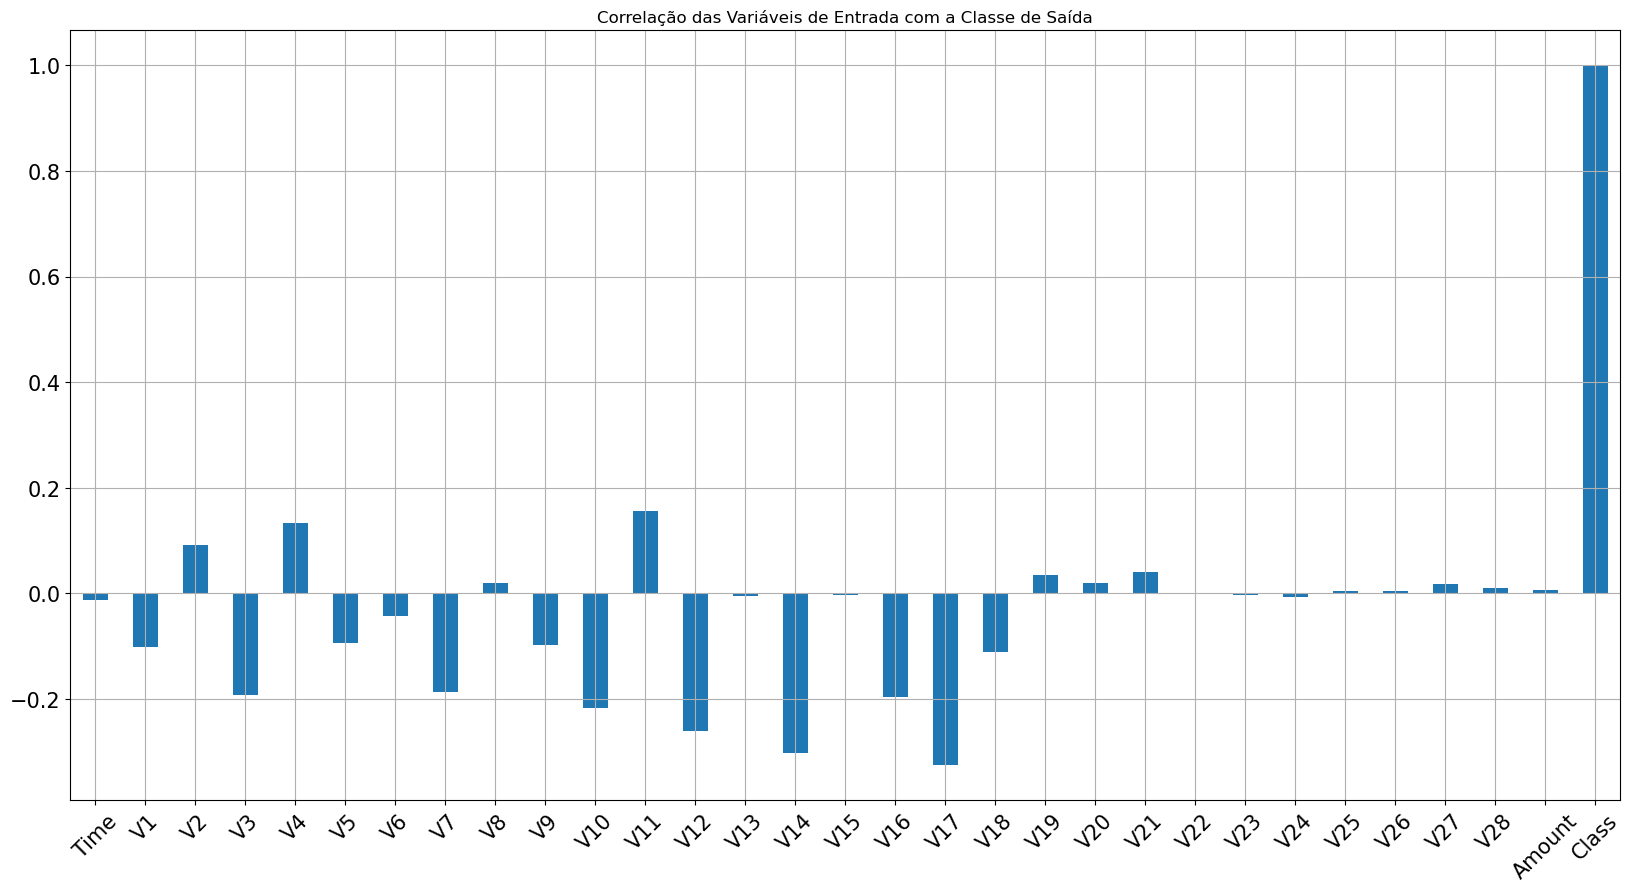

In [6]:
# Correlação de cada variável de entrada com a classe de saída
df.corrwith(df.Class).plot.bar(figsize = (20, 10), 
                               title = "Correlação das Variáveis de Entrada com a Classe de Saída", 
                               fontsize = 15, 
                               rot = 45, 
                               grid = True)

# Valores positivos indicam correlação positiva
# Valores positivos indicam correlação negativa
# Zero indica que não há correlação

In [7]:
# Resumo estatístico do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Função para visualizar a distribuição de cada variável
def cria_histograma(dataset, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataset[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distribuição", color = 'DarkRed')
        
    fig.tight_layout()  
    plt.show()

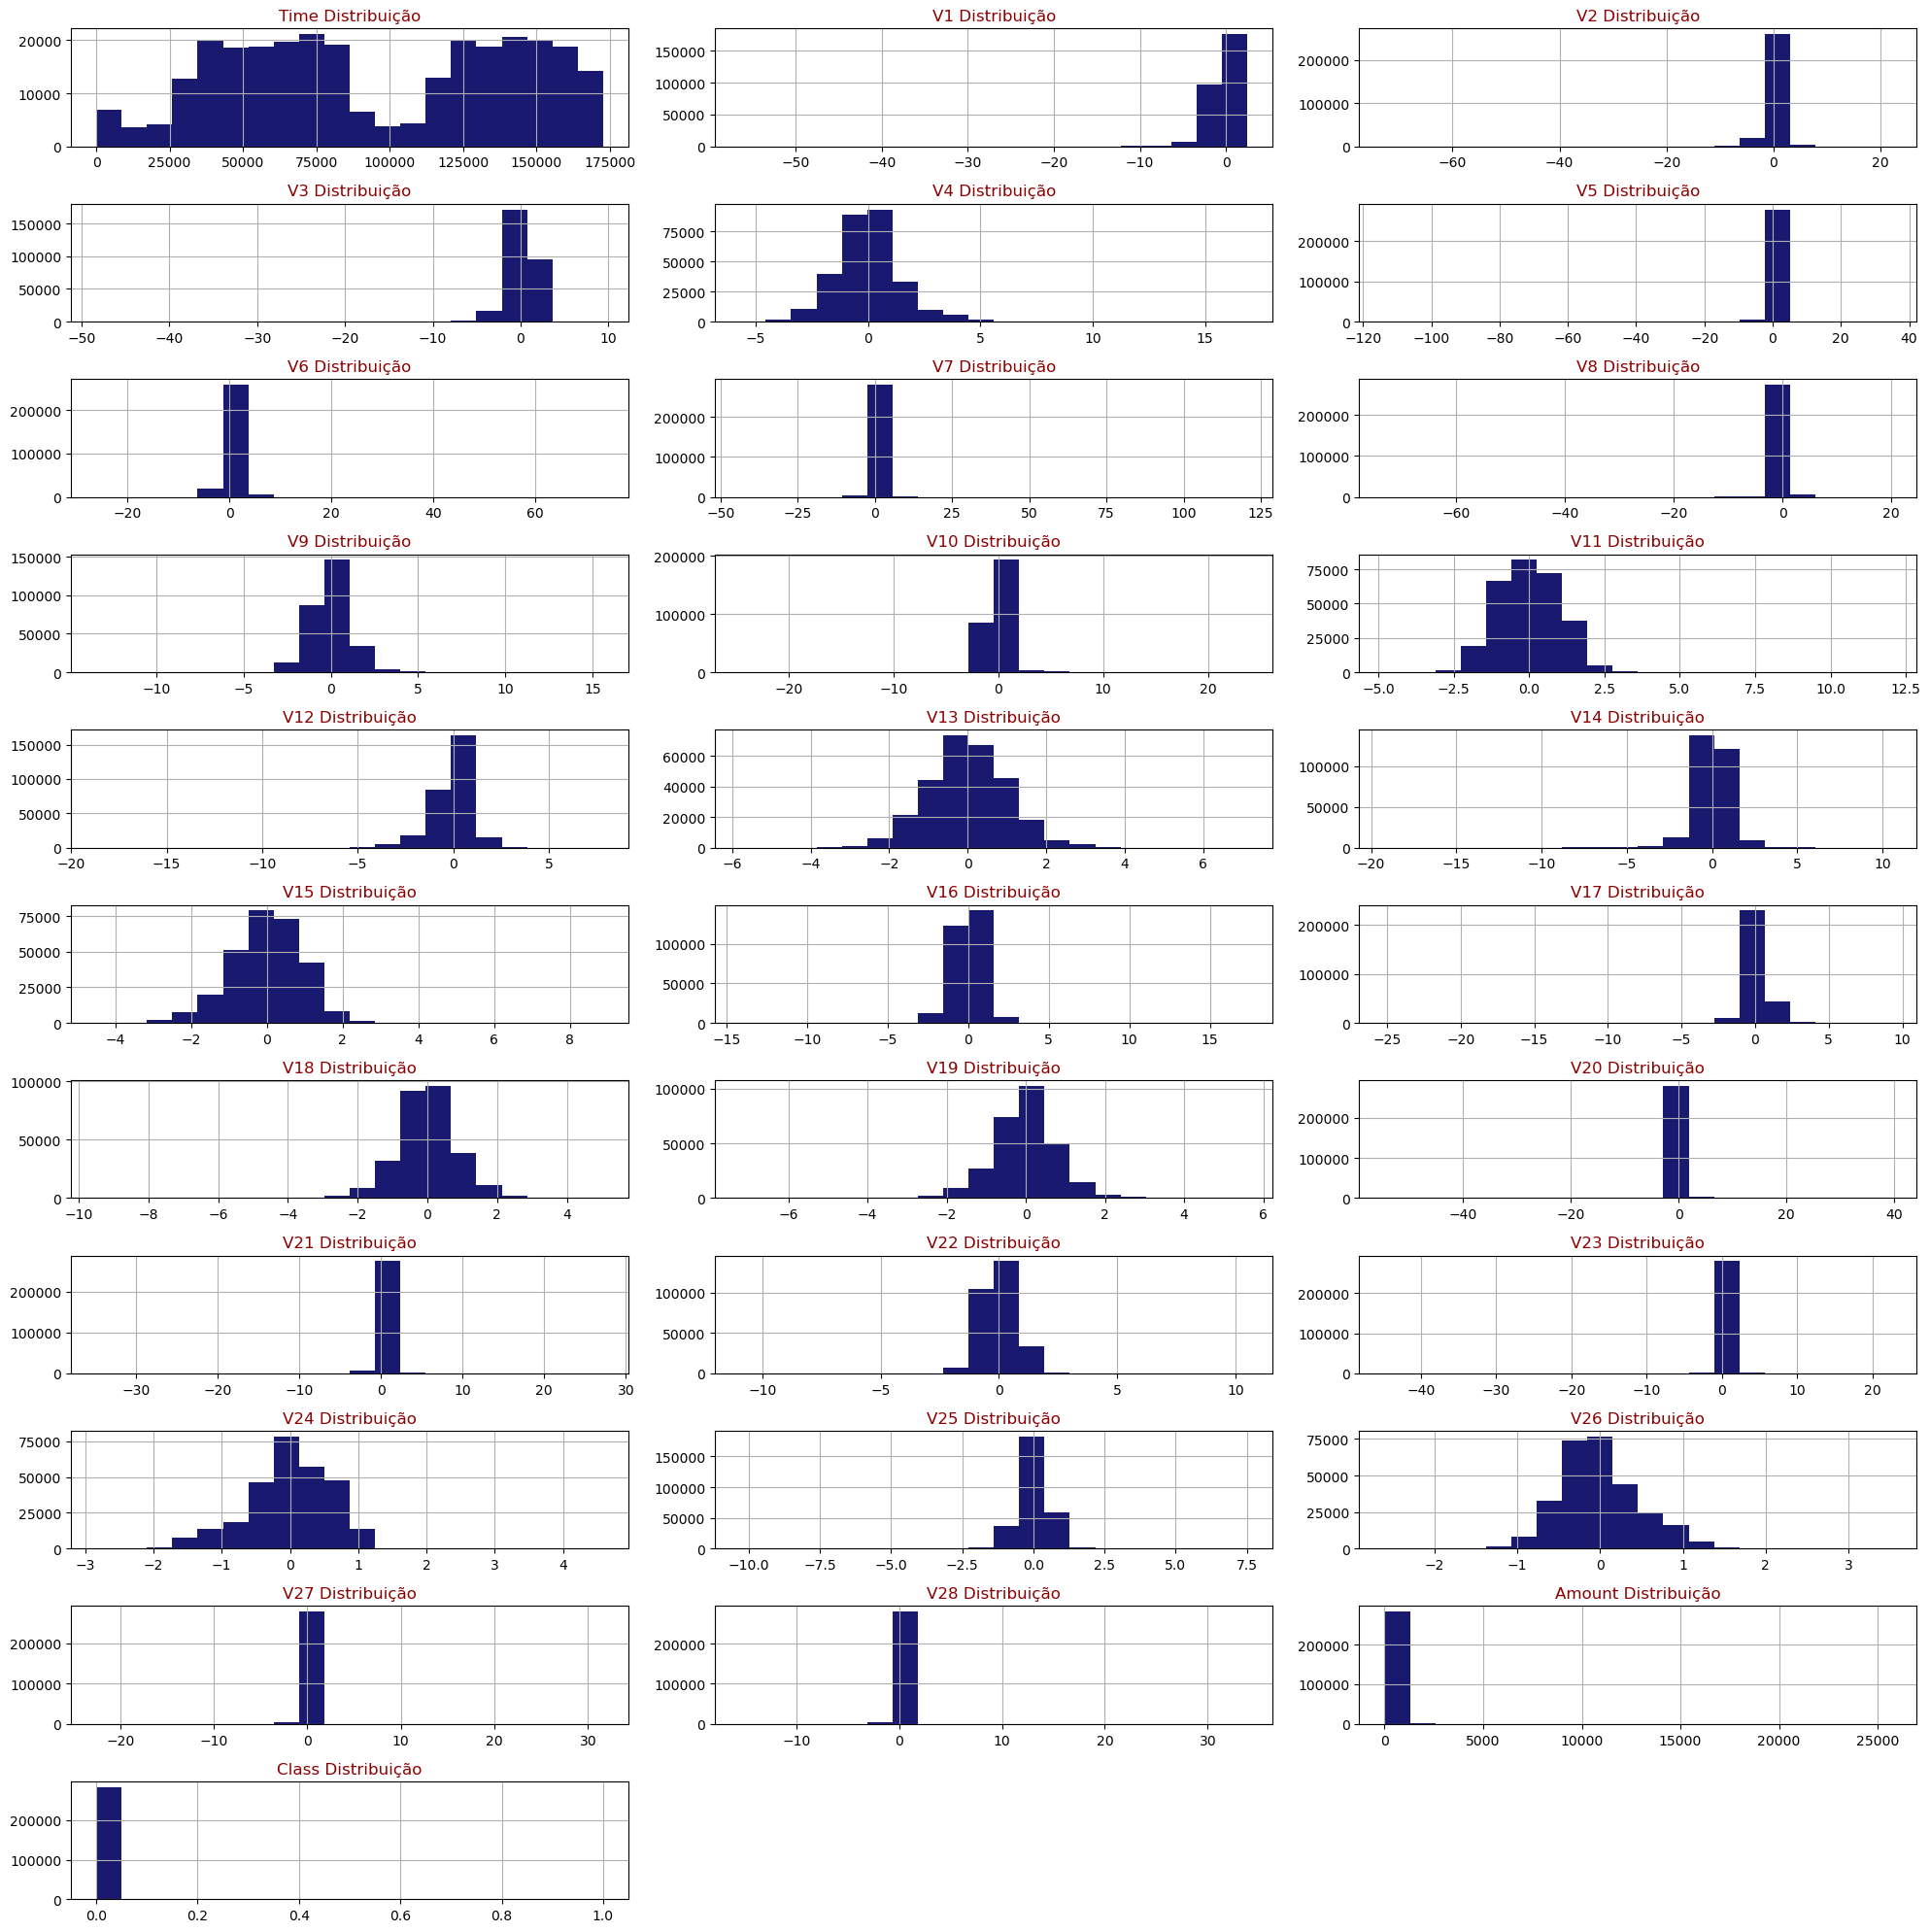

In [9]:
# Executa a função
cria_histograma(df, df.columns, 11, 3)

In [10]:
# Checando a proporção de registros por classe
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("Temos", len(frauds), "pontos de dados como fraude e", len(non_frauds), "pontos de dados considerados normais.")

Temos 492 pontos de dados como fraude e 284315 pontos de dados considerados normais.


In [11]:
clean_df = df.copy()

In [12]:
eps = 0.001 # 0 => 0.1¢
clean_df['Log Ammount'] = np.log(clean_df.pop('Amount')+eps)
clean_df.pop('Time')

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [23]:
train_df, test_df = train_test_split(clean_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

In [24]:
train_labels = np.array(train_df.pop('Class'))
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

In [25]:
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [27]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)


In [36]:
# Cria a primeira versão do modelo
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

return model

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

In [ ]:
# Separando os dados em entrada (X) e saída (y)
X = df.iloc[:,:-1]
y = df['Class']

In [ ]:
# Dividindo os dados em dataset de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Treinamento do modelo
modelo1.fit(X_treino.values, y_treino, epochs = 1)

In [ ]:
# Avaliação do modelo com dados de teste
print("Erro/Acurácia em Teste: ", modelo1.evaluate(X_teste.values, y_teste, verbose = 0))

In [ ]:
# Fazendo previsões com o modelo
y_previsto = modelo1.predict(X_teste.values).T[0].astype(int)

In [ ]:
# Classification Report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_teste, y_previsto, target_names = target_names))

In [ ]:
# Score AUC
print(roc_auc_score(y_teste, y_previsto))

In [ ]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, y_previsto)
print(cm)

In [ ]:
# Confusion Matrix Gráfica
skplt.metrics.plot_confusion_matrix(y_teste, y_previsto)
plt.show()

In [ ]:
# Classification Report
target_names = ['Class 0', 'Class 1']
print(classification_report(y_teste, y_previsto, target_names = target_names))

In [ ]:
# Score AUC
print(roc_auc_score(y_teste, y_previsto))

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_teste, y_previsto)
print(cm)

In [ ]:
type(y_previsto)

In [ ]:
type(y_teste)

In [ ]:
y_teste = np.array(y_teste)

In [ ]:
type(y_teste)

O comportamento agora parece bem melhor, não? Uma mudança simples nos dados que fez toda a diferença. E outras técnicas poderiam ser aplicadas, como redução de dimensionalidade ou padronização dos dados.

### Relatório Final de Performance do Modelo

In [ ]:
# Variáveis
false_neg = 0
false_pos = 0
incorretos = 0
total = len(y_teste)

# Loop pelas previsões e valores reais
for i in range(0, len(y_teste)):
    if (y_previsto[i] != y_teste[i]):
        incorretos += 1
        if (y_teste[i] == 1 and y_previsto[i] == 0):
            false_neg += 1
        else:
            false_pos += 1

inaccuracy = incorretos / total

print('Inacurácia:', inaccuracy * 100)
print('Acurácia:', (1 - inaccuracy) * 100)
print('Taxa de Falsos Negativos:', false_neg / incorretos * 100)
print('Taxa de Falsos Positivos:', false_pos / incorretos * 100)

Nosso modelo tem um bom desempenho geral, mas a taxa de falsos negativos ainda está alta. Poderíamos experimentar algumas técnicas, como redução de dimensionalidade dos dados, padronização, ajuste dos hiperparâmetros, mudança da arquitetura da rede ou mesmo aumentar o tempo total de treinamento.

# Fim